2178 midterm assignment coding part by Group 22. The colab link is https://colab.research.google.com/drive/1VBHVnd34YHA5lCozSIr5d587Ii8r4UBt?usp=sharing Note: if you can't see diagrams directly, please reload and run import part code.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import statsmodels.stats.api as sms
from datascience import Table
import re
str= "a long string for data science regex check"
ans = re.search("X", str, re.IGNORECASE)
print(ans)
from scipy.stats import ttest_ind
from statsmodels.stats.anova import AnovaRM
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.formula.api import ols
import statsmodels.api as sm

!pip install scikit_posthocs
!pip install pingouin
!pip install researchpy
import researchpy as rp
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from math import sqrt
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import TTestPower

<re.Match object; span=(35, 36), match='x'>
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
def cleandata(midtermdata):
  mydf = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
  mydf[['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID','PersonID','Perceived_Race','Sex','Age_group__at_arrest_','Youth_at_arrest__under_18_years','ArrestLocDiv','StripSearch','Booked',
        'Occurrence_Category','Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__','Actions_at_arrest___Resisted__d','Actions_at_arrest___Mental_inst','Actions_at_arrest___Assaulted_o','Actions_at_arrest___Cooperative','SearchReason_CauseInjury','SearchReason_AssistEscape','SearchReason_PossessWeapons','SearchReason_PossessEvidence','ItemsFound','ObjectId']]=mydf[['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID','PersonID','Perceived_Race','Sex','Age_group__at_arrest_','Youth_at_arrest__under_18_years','ArrestLocDiv','StripSearch','Booked',
        'Occurrence_Category','Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__','Actions_at_arrest___Resisted__d','Actions_at_arrest___Mental_inst','Actions_at_arrest___Assaulted_o','Actions_at_arrest___Cooperative','SearchReason_CauseInjury','SearchReason_AssistEscape','SearchReason_PossessWeapons','SearchReason_PossessEvidence','ItemsFound','ObjectId']].a
                                            
  mydf['Sex']=mydf['Sex'].astype('string')
  return mydf

#Preprocessing

In [69]:
dataset = pd.read_csv('/content/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
dataset.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [70]:
dataset.shape

(65276, 25)

In [71]:
group = dataset.groupby('Actions_at_arrest___Mental_inst')
print(group)
group.size()

Actions_at_arrest___Mental_inst
0    63097
1     2179
dtype: int64

In [72]:
group1 = dataset.groupby('StripSearch')
print(group1)
group1.size()

StripSearch
0    57475
1     7801
dtype: int64

In [73]:
dataset.groupby(by=['Actions_at_arrest___Mental_inst', 'Sex']).size()

Actions_at_arrest___Mental_inst  Sex
0                                F      12112
                                 M      50978
                                 U          7
1                                F        505
                                 M       1672
                                 U          2
dtype: int64

In [74]:
dataset.groupby(by=['Actions_at_arrest___Mental_inst', 'ArrestLocDiv']).size()

Actions_at_arrest___Mental_inst  ArrestLocDiv
0                                11               1766
                                 12               1868
                                 13               1081
                                 14               2956
                                 22               1810
                                 23               1713
                                 31               2140
                                 32               2019
                                 33                919
                                 41               2582
                                 42               1785
                                 43               2525
                                 51               4519
                                 52               2228
                                 53               1319
                                 54               1377
                                 55               1487
                   

In [75]:
dataset.groupby(by=['Actions_at_arrest___Mental_inst', 'Arrest_Year']).size()

Actions_at_arrest___Mental_inst  Arrest_Year
0                                2020           30871
                                 2021           32226
1                                2020            1108
                                 2021            1071
dtype: int64

In [76]:
dataset.groupby(by=['StripSearch', 'Sex']).size()

StripSearch  Sex
0            F      11334
             M      46132
             U          9
1            F       1283
             M       6518
dtype: int64

In [77]:
dataset.groupby(by=['StripSearch', 'Age_group__at_arrest_', 'Sex', 'Arrest_Year']).size()

StripSearch  Age_group__at_arrest_      Sex  Arrest_Year
0            Aged 17 years and under    F    2021            278
                                        M    2021           1074
             Aged 17 years and younger  F    2020            424
                                        M    2020            986
             Aged 18 to 24 years        F    2020            868
                                             2021            986
                                        M    2020           3183
                                             2021           3653
                                        U    2020              2
             Aged 25 to 34 years        F    2020           1543
                                             2021           2166
                                        M    2020           6093
                                             2021           8372
                                        U    2020              1
                                 

In [78]:
df = pd.DataFrame({
    'Mental_inst_count':['3','6','2','17','5','2','14','6','7','6','9','14','59','10','3','8','6','63','6','16','9','61','17','10','61','28','14','26','35','33','175','64','24','25','38','221','6','3','2','12','3','2','11','6','3','11','1','7','60','6','7','13','3','105','8','9','8','71','15','11','40','28','12','15','16','28','210','29','23','14','18','254'],
    'Sex':['F','F','F','F','F','F','F','F','F','F','F','F','F','F','F','F','F','F','M','M','M','M','M','M','M','M','M','M','M','M','M','M','M','M','M','M','F','F','F','F','F','F','F','F','F','F','F','F','F','F','F','F','F','F','M','M','M','M','M','M','M','M','M','M','M','M','M','M','M','M','M','M'],
    'Year':['2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021'],
    'ArrestLocDiv':['11','12','13','14','22','23','31','32','33','41','42','43','51','52','53','54','55','XX','11','12','13','14','22','23','31','32','33','41','42','43','51','52','53','54','55','XX','11','12','13','14','22','23','31','32','33','41','42','43','51','52','53','54','55','XX','11','12','13','14','22','23','31','32','33','41','42','43','51','52','53','54','55','XX'],
})


print(df)

   Mental_inst_count Sex  Year ArrestLocDiv
0                  3   F  2020           11
1                  6   F  2020           12
2                  2   F  2020           13
3                 17   F  2020           14
4                  5   F  2020           22
..               ...  ..   ...          ...
67                29   M  2021           52
68                23   M  2021           53
69                14   M  2021           54
70                18   M  2021           55
71               254   M  2021           XX

[72 rows x 4 columns]


In [79]:
df['Mental_inst_count'] = pd.to_numeric(df['Mental_inst_count'], errors='coerce')

In [80]:
df2 = pd.DataFrame({
    'StripSearch':['27','4','200','15','476','46','313','32','121','14','30','1','4','0','244','5','1046','88','2044','205','1555','198','719','51','309','22','27','5'],
    'Sex':['F','F','F','F','F','F','F','F','F','F','F','F','F','F','M','M','M','M','M','M','M','M','M','M','M','M','M','M'],
    'Year':['2020','2021','2020','2021','2020','2021','2020','2021','2020','2021','2020','2021','2020','2021','2020','2021','2020','2021','2020','2021','2020','2021','2020','2021','2020','2021','2020','2021',],
    'Age_group__at_arrest_':['<17','<17','18-24','18-24','25-34','25-34','35-44','35-44','45-54','45-54','55-64','55-64','>65','>65','<17','<17','18-24','18-24','25-34','25-34','35-44','35-44','45-54','45-54','55-64','55-64','>65','>65'],
})
print(df2)
df2['StripSearch'] = pd.to_numeric(df2['StripSearch'], errors='coerce')

   StripSearch Sex  Year Age_group__at_arrest_
0           27   F  2020                   <17
1            4   F  2021                   <17
2          200   F  2020                 18-24
3           15   F  2021                 18-24
4          476   F  2020                 25-34
5           46   F  2021                 25-34
6          313   F  2020                 35-44
7           32   F  2021                 35-44
8          121   F  2020                 45-54
9           14   F  2021                 45-54
10          30   F  2020                 55-64
11           1   F  2021                 55-64
12           4   F  2020                   >65
13           0   F  2021                   >65
14         244   M  2020                   <17
15           5   M  2021                   <17
16        1046   M  2020                 18-24
17          88   M  2021                 18-24
18        2044   M  2020                 25-34
19         205   M  2021                 25-34
20        155

# Power analysis

In [ ]:
import scipy.stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt

power_analysis = smp.TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=0.5, power=0.8, alpha=0.05)
sample_size

/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


63.765610587854056

<ipython-input-11-1c82f06b420f>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


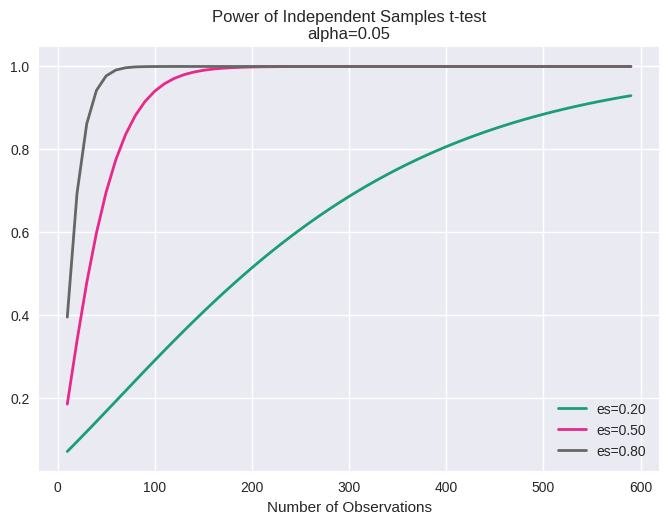

In [ ]:
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(10, 600, 10))

plt.style.use('seaborn')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig = power_analysis.plot_power(
    dep_var='nobs', nobs=sample_sizes,  
    effect_size=effect_sizes, alpha=0.05, ax=ax, 
    title='Power of Independent Samples t-test\nalpha=0.05')

In [ ]:
num_runs = 65276
effectSize = 0.5

# perform power analysis to get sample size
power_analysis = smp.TTestIndPower()
sampleSize = power_analysis.solve_power(
    effect_size=effectSize, power=0.8, alpha=0.05)

# round up from estimated sample size
sampleSize = np.int(np.ceil(sampleSize))

# create a function that will generate samples and test for
# a difference between groups using a two-sample t-test


def get_t_result(sampleSize, effectSize):
    """
    perform a ttest on random data of n=sampSize
    """
    
    group1 = np.random.normal(loc=0.0, scale=1.0, size=sampleSize)
    group2 = np.random.normal(loc=effectSize, scale=1.0, size=sampleSize)
    ttresult = scipy.stats.ttest_ind(group1, group2)
    return(ttresult.pvalue)


# create input data frame for output
power_sim_results = pd.DataFrame({'p_value': np.zeros(num_runs)})

for run in range(num_runs):
    power_sim_results.loc[run, 'p_value'] = get_t_result(sampleSize, effectSize)


p_reject = np.mean(power_sim_results['p_value'] < 0.05)
p_reject

/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
<ipython-input-43-c1dee6cc5f61>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sampleSize = np.int(np.ceil(sampleSize))


0.79805747901219437

In [ ]:
n1, n2 = 36, 36

# variance of samples in pilot study
s1, s2 = 22, 63

# calculate the pooled standard deviation
# (Cohen's d)
s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))

# means of the samples
u1, u2 = 90, 85

# calculate the effect size
d = (u1 - u2) / s
print(f'Effect size: {d}')

# factors for power analysis
alpha = 0.05
power = 0.8

# perform power analysis to find sample size
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power,
					ratio=1, alternative='two-sided')

print('Sample size/Number needed in each group: {:.3f}'.format(n))

Effect size: 0.7669649888473704
Sample size/Number needed in each group: 27.680


/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


In [ ]:
power = TTestPower()
n_test = power.solve_power(nobs=36, effect_size = 0.5,
						power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 0.831


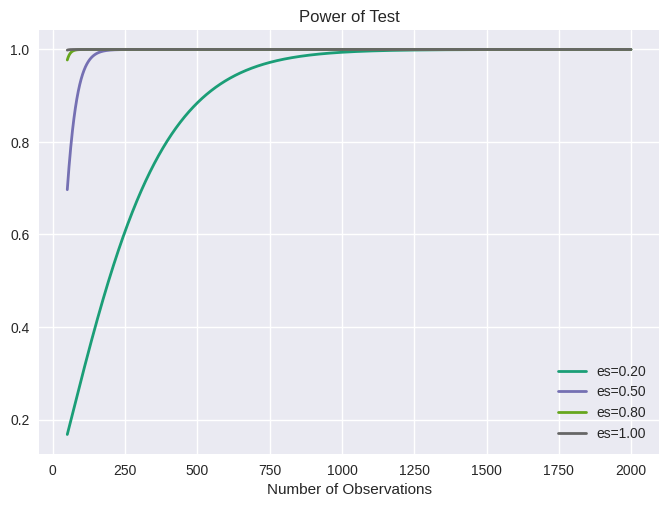

In [ ]:
effect_sizes = np.array([0.2, 0.5, 0.8,1.0])
sample_sizes = np.array(range(50, 2000))

# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
			effect_size=effect_sizes)

plt.show()

#EDA

In [ ]:
df_groups = dataset.groupby(['ArrestLocDiv'])['Actions_at_arrest___Mental_inst'].sum()
df_groups.plot(kind='bar')

<Axes: xlabel='ArrestLocDiv'>

(0.0, 260.0)

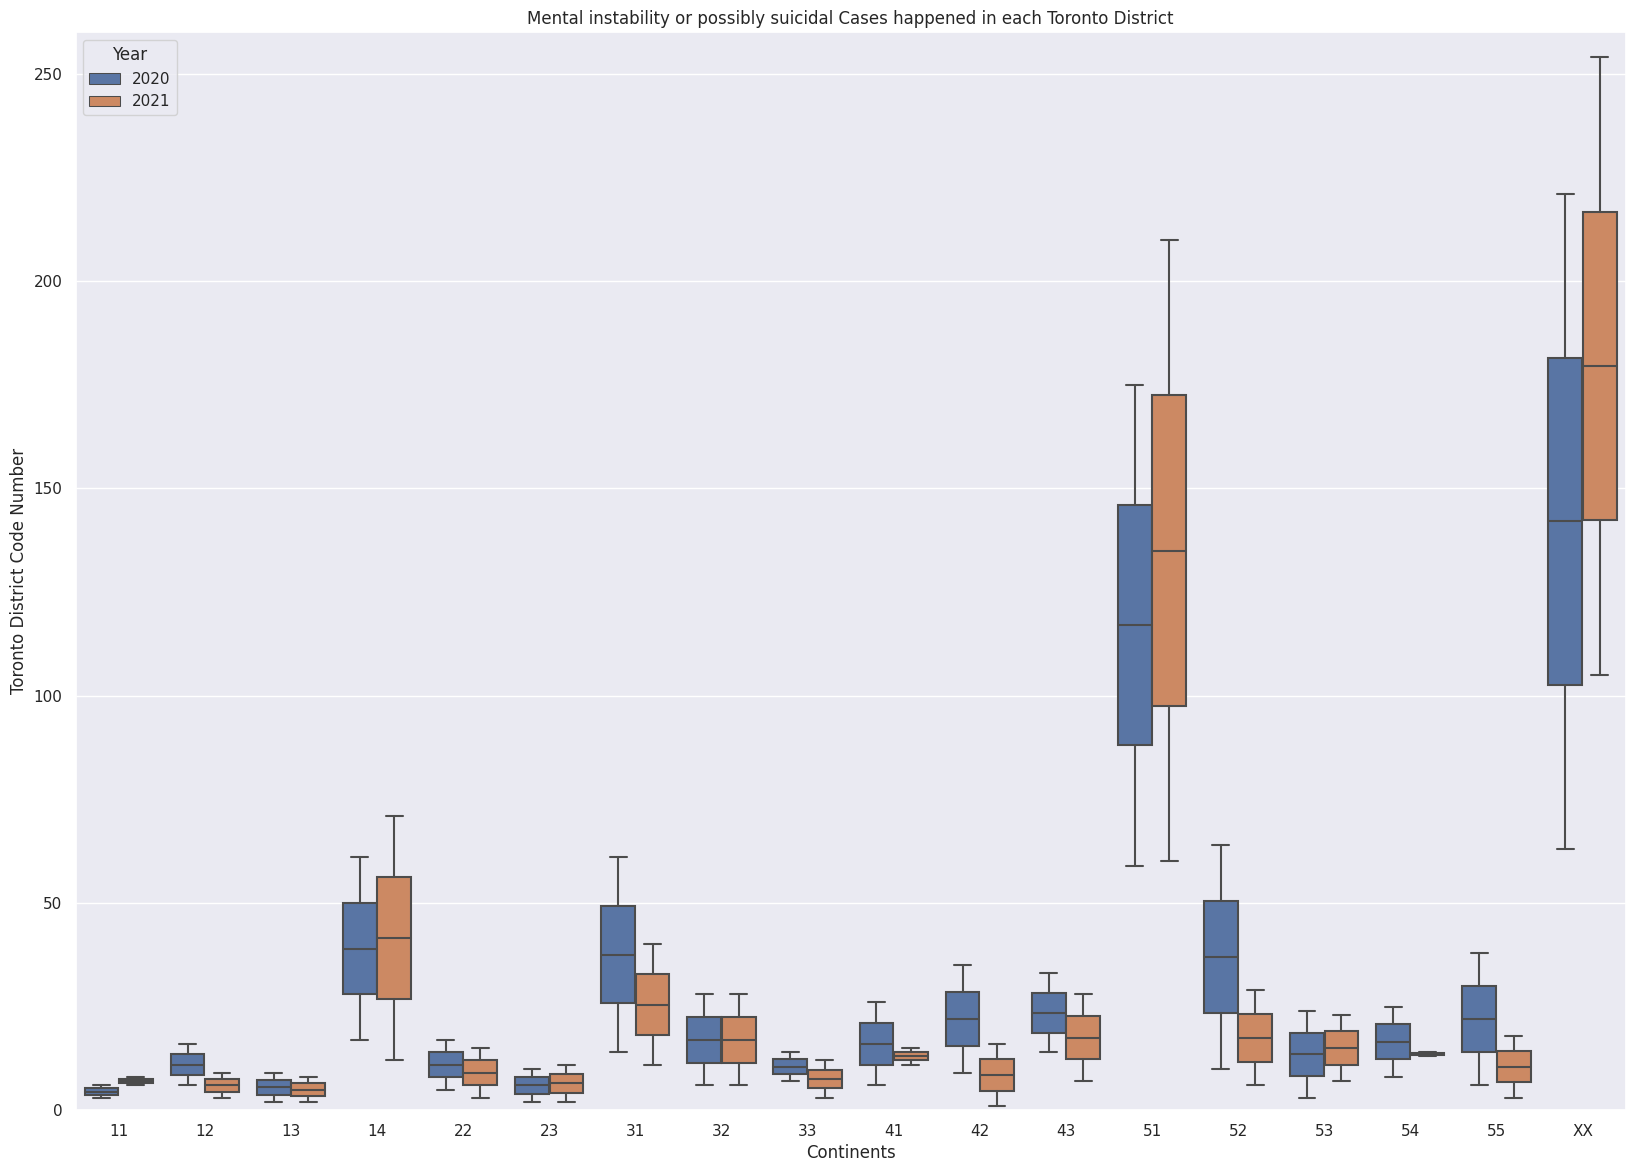

In [ ]:
sns.set(rc={'figure.figsize':(20,14)})
p = sns.boxplot(data=df, x = "ArrestLocDiv", y ="Mental_inst_count", hue="Year")
p.set(title = 'Mental instability or possibly suicidal Cases happened in each Toronto District')
p.set(xlabel='Continents', ylabel='Toronto District Code Number')
p.set_ylim(0,260)

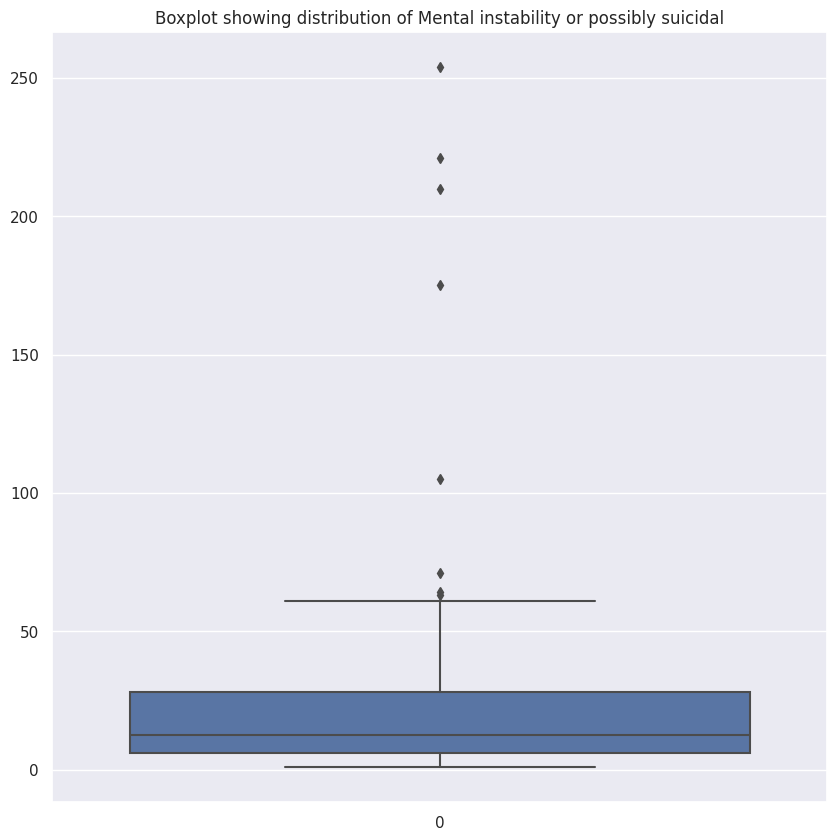

In [ ]:

plt.figure(figsize= (10,10))
sns.boxplot(data = df['Mental_inst_count'])
plt.title('Boxplot showing distribution of Mental instability or possibly suicidal')
plt.xlabel('')
plt.ylabel('')
plt.show()

<Axes: xlabel='Sex'>

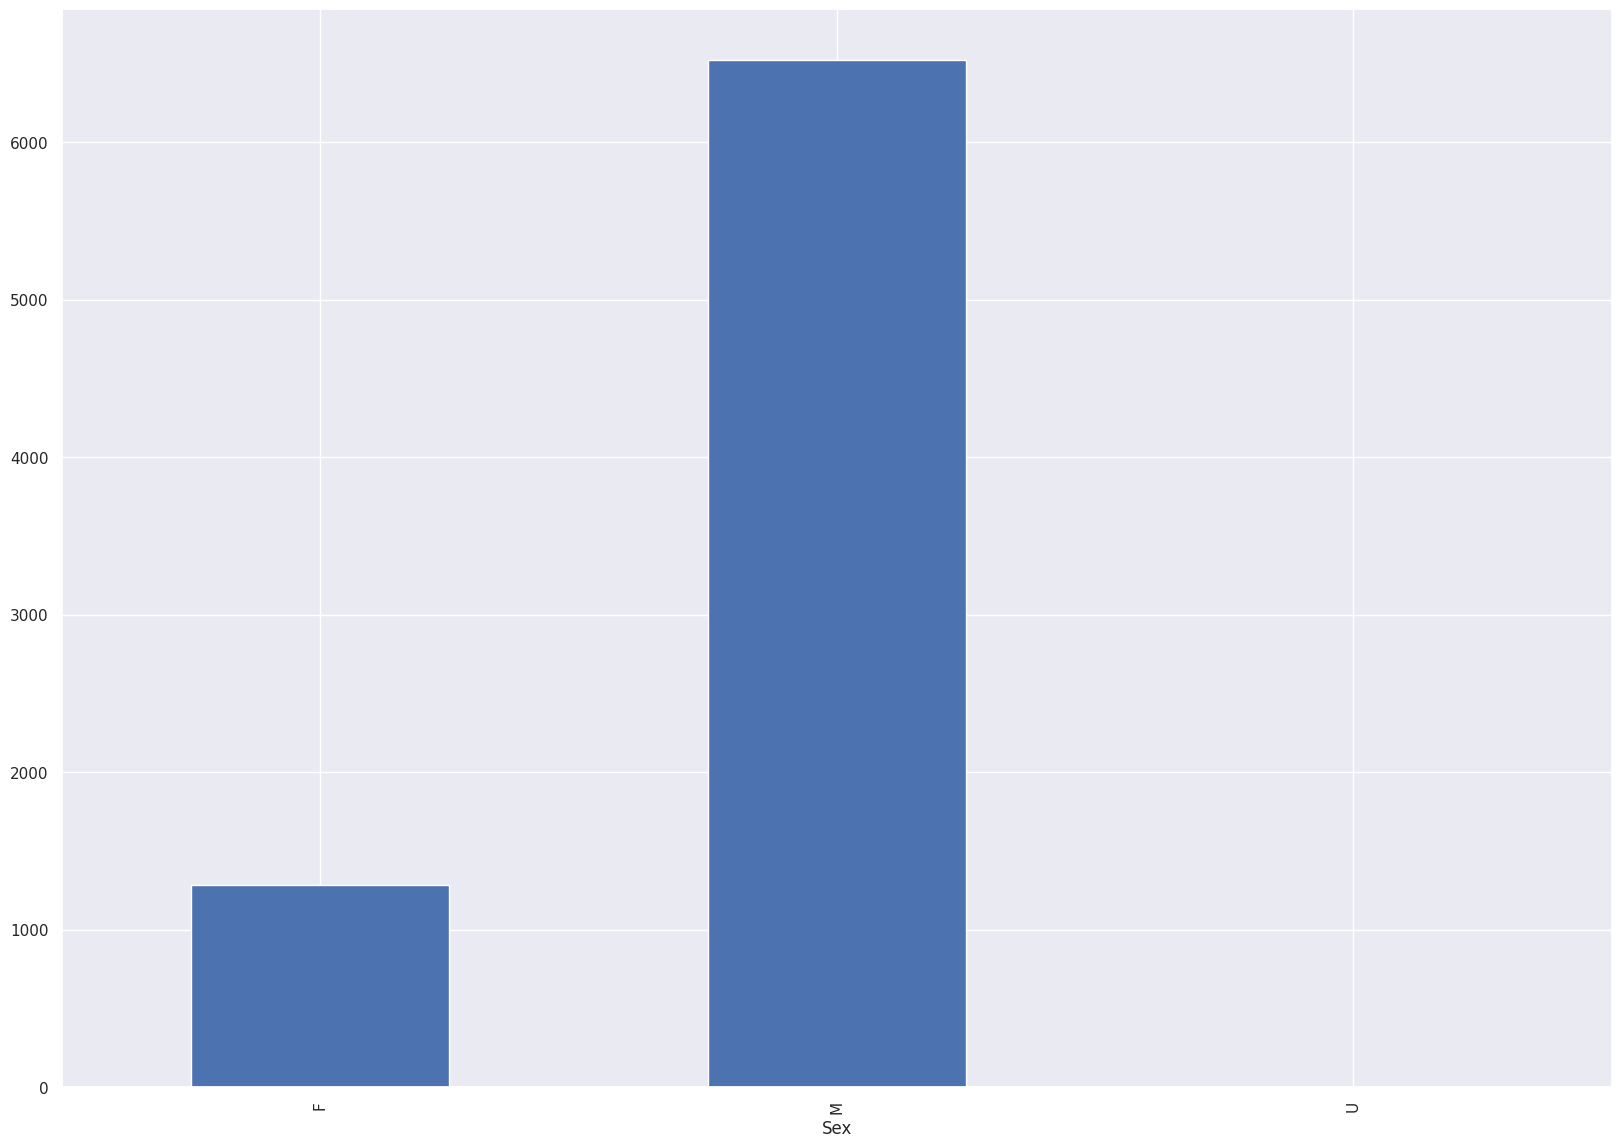

In [ ]:
df_groups2 = dataset.groupby(['Sex'])['StripSearch'].sum()
df_groups2.plot(kind='bar')

<AxesSubplot:xlabel='Age_group__at_arrest_'>

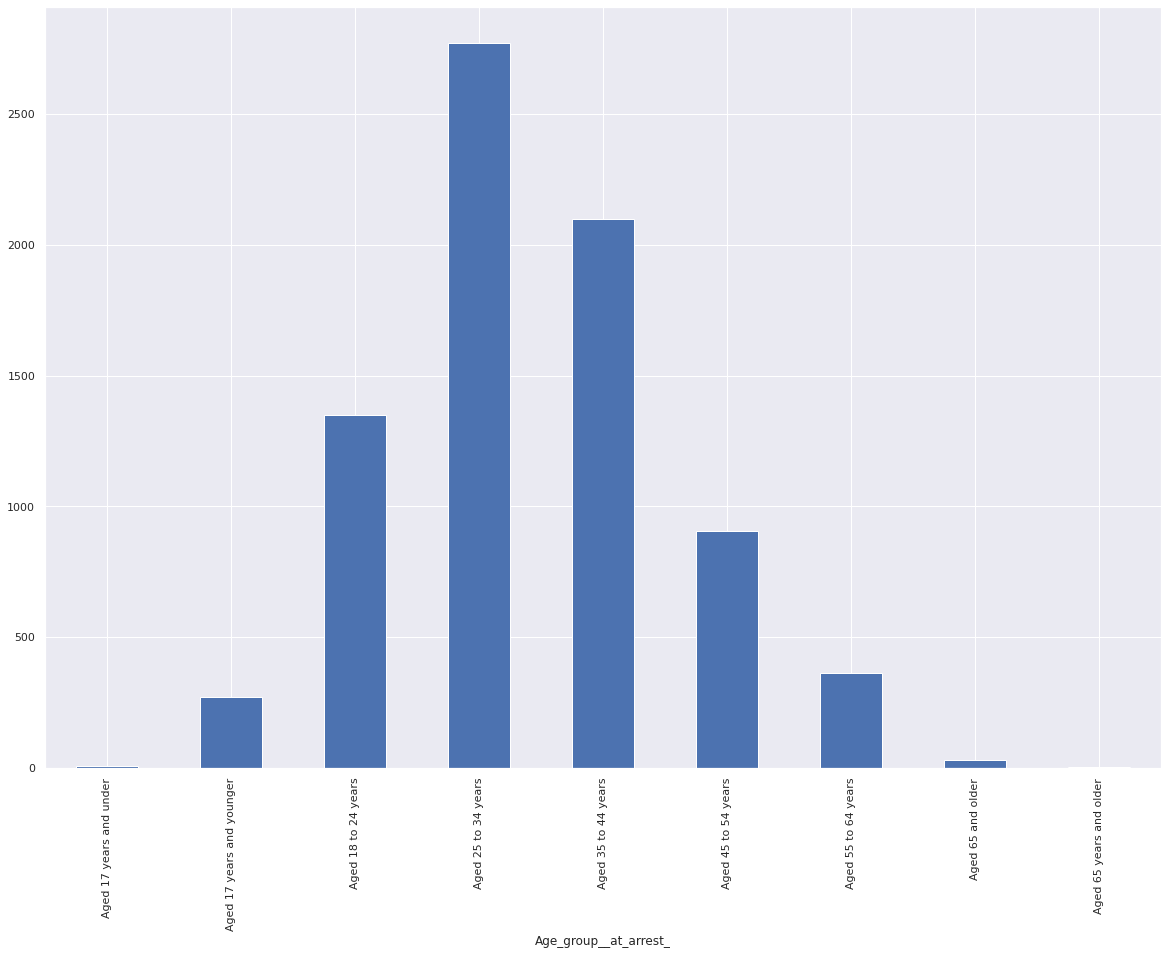

In [ ]:
df_groups3 = dataset.groupby(['Age_group__at_arrest_'])['StripSearch'].sum()
df_groups3.plot(kind='bar')

#T-test

In [ ]:
df['Mental_inst_count'] = pd.to_numeric(df['Mental_inst_count'], errors='coerce')
df['Sex'] = df['Sex'].astype("string")

In [ ]:
df['Sex'].unique()

<StringArray>
['F', 'M']
Length: 2, dtype: string

In [ ]:
df.groupby('Sex')['Mental_inst_count'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,36.0,13.916667,22.089914,1.0,3.0,6.0,11.25,105.0
M,36.0,46.444444,63.385643,6.0,14.0,24.5,38.50,254.0


In [ ]:
df.groupby('Year')['Mental_inst_count'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2020,36.0,30.638889,45.734109,2.0,6.0,14.0,33.50,221.0
2021,36.0,29.722222,54.385718,1.0,6.0,11.5,24.25,254.0


In [ ]:
df.groupby('ArrestLocDiv')['Mental_inst_count'].describe()

,count,mean,std,min,25%,50%,75%,max
ArrestLocDiv,,,,,,,,
11,4.0,5.75,2.061553,3.0,5.25,6.0,6.50,8.0
12,4.0,8.50,5.567764,3.0,5.25,7.5,10.75,16.0
13,4.0,5.25,3.774917,2.0,2.00,5.0,8.25,9.0
14,4.0,40.25,30.081833,12.0,15.75,39.0,63.50,71.0
22,4.0,10.00,7.023769,3.0,4.50,10.0,15.50,17.0
23,4.0,6.25,4.924429,2.0,2.00,6.0,10.25,11.0
31,4.0,31.50,23.586719,11.0,13.25,27.0,45.25,61.0
32,4.0,17.00,12.701706,6.0,6.00,17.0,28.00,28.0
33,4.0,9.00,4.966555,3.0,6.00,9.5,12.50,14.0


Hypotheses: </br>
H0: There is no significant difference in Mental instability or possibly suicidal between males and females.</br>
H1: There is a significant difference in Mental instability or possibly suicidal between males and females.

In [ ]:
M = df[df['Sex']=='M']
F = df[df['Sex']=='F']


M_mental = M['Mental_inst_count']
F_mental = F['Mental_inst_count']

#conduct ttest
print('T-test between males and females:',stats.ttest_ind(M_mental, F_mental, equal_var=False)) #p value is significant

T-test between males and females: Ttest_indResult(statistic=2.907530756162966, pvalue=0.0057205865818019631)


In [ ]:
M_mental

18      6
19     16
20      9
21     61
22     17
23     10
24     61
25     28
26     14
27     26
28     35
29     33
30    175
31     64
32     24
33     25
34     38
35    221
54      8
55      9
56      8
57     71
58     15
59     11
60     40
61     28
62     12
63     15
64     16
65     28
66    210
67     29
68     23
69     14
70     18
71    254
Name: Mental_inst_count, dtype: int64

In [ ]:
print('Mean for Mental instability or possibly suicidal, Male, Female:',M_mental.mean(), F_mental.mean())
print('Standard deviation for Mental instability or possibly suicidal, Male, Female:',M_mental.std(), F_mental.std())
     

Mean for Mental instability or possibly suicidal, Male, Female: 46.4444444444 13.9166666667
Standard deviation for Mental instability or possibly suicidal, Male, Female: 63.3856425584 22.0899136647


In [ ]:
cm = sms.CompareMeans(sms.DescrStatsW(M_mental), sms.DescrStatsW(F_mental))
print('Confidence interval for Mental instability or possibly suicidal:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for Mental instability or possibly suicidal: (9.971873710577583, 55.083681844977974)


In [ ]:
#degrees of freedom code for Welch test 

def welch_dof(x, y): 
 
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof

In [ ]:
#welch dof 
print('DOF for Mental instability or possibly suicidal:',welch_dof(M_mental, F_mental))

DOF for Mental instability or possibly suicidal: 43.3780881415


UNPAIRED TWO SAMPLE T-TEST

In [ ]:
#Then we can do multiple Unpaired Two Sample T-Test to see whether StripSearch varies in different groups of a variable.
# Mental instability or possibly suicidal for 2 different Genders
male_mental = df["Mental_inst_count"][df["Sex"] == "M"]
female_mental = df["Mental_inst_count"][df["Sex"] == "F"]
t_test_gender = stats.ttest_ind(male_mental, female_mental) # Do the t-test
print("Two Sample T-test result for 2 different Genders:\n")
print(t_test_gender)


Two Sample T-test result for 2 different Genders:

Ttest_indResult(statistic=2.907530756162966, pvalue=0.0048764190384856876)


In [ ]:
male_search = df2["StripSearch"][df2["Sex"] == "M"]
female_search = df2["StripSearch"][df2["Sex"] == "F"]
t_test_gender2 = stats.ttest_ind(male_search, female_search) # Do the t-test
print("Two Sample T-test result for Strip Search in 2 different Genders:\n")
print(t_test_gender2)


Two Sample T-test result for Strip Search in 2 different Genders:

Ttest_indResult(statistic=2.1153284880872021, pvalue=0.044140920667480925)


Two-way ANOVA</br>
Hypotheses:</br>
H0: There is no significant main effect of Sex or Age group at arrest on StripSearch.</br>
H1: There is a significant main effect of Sex or Age group at arrest on StripSearch.</br>
H2: There is a significant interaction effect between Sex and Age group at arrest on StripSearch.


In [81]:
model1 = ols("StripSearch ~ C(Sex) + C(Age_group__at_arrest_) + C(Sex):C(Age_group__at_arrest_)", data=df2).fit()
aov_table1 = sm.stats.anova_lm(model1, typ=2)
print(aov_table1)

                                       sum_sq    df         F    PR(>F)
C(Sex)                           9.787580e+05   1.0  3.893754  0.068542
C(Age_group__at_arrest_)         1.558988e+06   6.0  1.033677  0.444279
C(Sex):C(Age_group__at_arrest_)  6.090137e+05   6.0  0.403802  0.864393
Residual                         3.519126e+06  14.0       NaN       NaN


In [82]:
model2 = ols("StripSearch ~ C(Year) + C(Age_group__at_arrest_) + C(Year):C(Age_group__at_arrest_)", data=df2).fit()
aov_table2 = sm.stats.anova_lm(model2, typ=2)
print(aov_table2)

                                        sum_sq    df         F    PR(>F)
C(Year)                           1.476144e+06   1.0  7.857849  0.014092
C(Age_group__at_arrest_)          1.558988e+06   6.0  1.383141  0.287750
C(Year):C(Age_group__at_arrest_)  1.000769e+06   6.0  0.887887  0.529137
Residual                          2.629984e+06  14.0       NaN       NaN


In [83]:
model3 = ols("StripSearch ~ C(Sex) + C(Year) + C(Sex):C(Year)", data=df2).fit()
aov_table3 = sm.stats.anova_lm(model3, typ=2)
print(aov_table3)

                      sum_sq    df         F    PR(>F)
C(Sex)          9.787580e+05   1.0  6.622096  0.016678
C(Year)         1.476144e+06   1.0  9.987320  0.004228
C(Sex):C(Year)  6.637400e+05   1.0  4.490743  0.044619
Residual        3.547244e+06  24.0       NaN       NaN


In [84]:
model4 = ols("Mental_inst_count ~ C(Sex) + C(Year) + C(Sex):C(Year)", data=df).fit()
aov_table4 = sm.stats.anova_lm(model4, typ=2)
print(aov_table4)

                       sum_sq    df         F    PR(>F)
C(Sex)           19045.013889   1.0  8.217059  0.005519
C(Year)             15.125000   1.0  0.006526  0.935853
C(Sex):C(Year)      78.125000   1.0  0.033707  0.854877
Residual        157606.388889  68.0       NaN       NaN


In [85]:
model5 = ols("Mental_inst_count ~ C(ArrestLocDiv) + C(Year) + C(ArrestLocDiv):C(Year)", data=df).fit()
aov_table5 = sm.stats.anova_lm(model5, typ=2)
print(aov_table5)

                                sum_sq    df         F    PR(>F)
C(ArrestLocDiv)          123491.902778  17.0  5.170628  0.000017
C(Year)                      15.125000   1.0  0.010766  0.917937
C(ArrestLocDiv):C(Year)    2661.125000  17.0  0.111422  0.999993
Residual                  50576.500000  36.0       NaN       NaN


In [86]:
model6 = ols("Mental_inst_count ~ C(ArrestLocDiv) + C(Sex) + C(ArrestLocDiv):C(Sex)", data=df).fit()
aov_table6 = sm.stats.anova_lm(model6, typ=2)
print(aov_table6)

                               sum_sq    df           F        PR(>F)
C(ArrestLocDiv)         123491.902778  17.0   72.511372  1.015776e-22
C(Sex)                   19045.013889   1.0  190.106890  6.195673e-16
C(ArrestLocDiv):C(Sex)   30601.236111  17.0   17.968284  1.031427e-12
Residual                  3606.500000  36.0         NaN           NaN


In [ ]:
df2.loc[df2["Sex"]=="M"]

,StripSearch,Sex,Year,Age_group__at_arrest_
14,244,M,2020,<17
15,5,M,2021,<17
16,1046,M,2020,18-24
17,88,M,2021,18-24
18,2044,M,2020,25-34
19,205,M,2021,25-34
20,1555,M,2020,35-44
21,198,M,2021,35-44
22,719,M,2020,45-54
23,51,M,2021,45-54


In [ ]:
df2.loc[df2["Sex"] == "F"]

,StripSearch,Sex,Year,Age_group__at_arrest_
0,27,F,2020,<17
1,4,F,2021,<17
2,200,F,2020,18-24
3,15,F,2021,18-24
4,476,F,2020,25-34
5,46,F,2021,25-34
6,313,F,2020,35-44
7,32,F,2021,35-44
8,121,F,2020,45-54
9,14,F,2021,45-54


In [ ]:
male_2020 = [244,1046,2044,1555,719,309,27]
male_2021 = [5,88,205,198,51,22,5]
female_2020 = [27,200,476,313,121,30,4]
female_2021 = [4,15,46,32,14,1,0]
df_tukey = pd.DataFrame({'StripSearch':[244,1046,2044,1555,719,309,27,
                      5,88,205,198,51,22,5,
                      27,200,476,313,121,30,4,
                      4,15,46,32,14,1,0],
              'Group':np.repeat(["male_2020", "male_2021", "female_2020", "female_2021"], repeats=7)})
tukey = pairwise_tukeyhsd(endog=df_tukey['StripSearch'],groups=df_tukey['Group'],alpha=0.05)
print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1      group2    meandiff p-adj    lower      upper   reject
--------------------------------------------------------------------
female_2020 female_2021 -151.2857 0.8746   -718.202  415.6306  False
female_2020   male_2020  681.8571 0.0143   114.9408 1248.7735   True
female_2020   male_2021  -85.2857    0.9   -652.202  481.6306  False
female_2021   male_2020  833.1429 0.0024   266.2265 1400.0592   True
female_2021   male_2021      66.0    0.9  -500.9163  632.9163  False
  male_2020   male_2021 -767.1429 0.0053 -1334.0592 -200.2265   True
--------------------------------------------------------------------


#Interaction plot

In [ ]:
df['Year'] = df['Year'].astype("string")

In [ ]:
df['Year']

0     2020
1     2020
2     2020
3     2020
4     2020
      ... 
67    2021
68    2021
69    2021
70    2021
71    2021
Name: Year, Length: 72, dtype: string

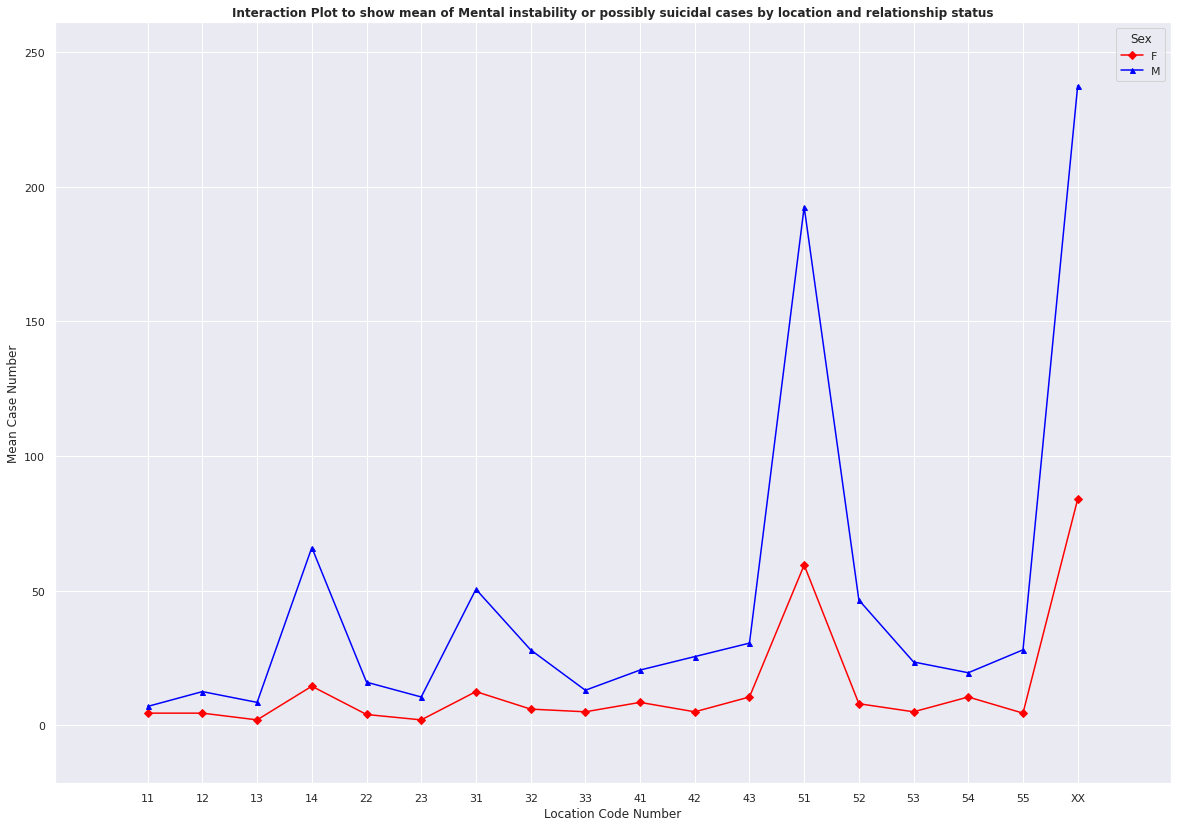

In [ ]:
year = df['Sex'].astype("category")
mental = df['Mental_inst_count'].values


interaction = interaction_plot(df['ArrestLocDiv'], year, mental, colors=['red','blue'], markers=['D','^'], ms=5)
#x axis(m_edu), trace (romantic status of the student), dependent variable (mean grade)


plt.ylabel('Mean Case Number')
plt.xlabel('Location Code Number')
plt.title('Interaction Plot to show mean of Mental instability or possibly suicidal cases by location and relationship status', fontweight='bold')
plt.show()

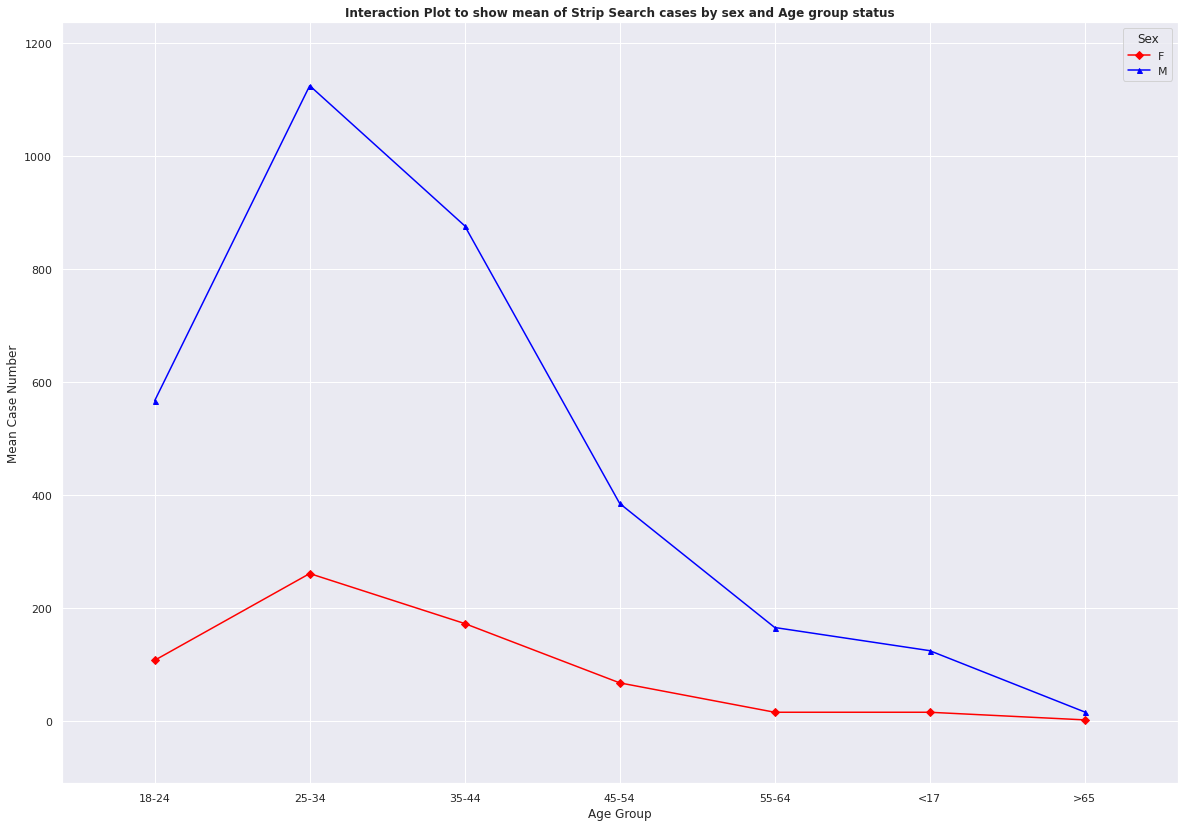

In [ ]:
sex = df2['Sex'].astype("category")
stripsearch = df2['StripSearch'].values
interaction = interaction_plot(df2['Age_group__at_arrest_'], sex, stripsearch, colors=['red','blue'], markers=['D','^'], ms=5)
plt.ylabel('Mean Case Number')
plt.xlabel('Age Group')
plt.title('Interaction Plot to show mean of Strip Search cases by sex and Age group status', fontweight='bold')
plt.show()

# ANCOVA

In [ ]:
# Perform the ANCOVA (We will analyze the effect of Sex on the Mental_inst_count while controlling for the covariate Year.)
model = ols('Mental_inst_count ~ Sex + Year', data=df).fit()

In [ ]:
# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Mental_inst_count   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     4.170
Date:                Wed, 12 Apr 2023   Prob (F-statistic):             0.0195
Time:                        18:42:11   Log-Likelihood:                -379.06
No. Observations:                  72   AIC:                             764.1
Df Residuals:                      69   BIC:                             771.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       14.3750      9.758      1.473   

In [ ]:
# Perform the ANCOVA (We will analyze the effect of Sex on the Mental_inst_count while controlling for the area.)
model = ols('Mental_inst_count ~ Sex + ArrestLocDiv', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Mental_inst_count   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     12.27
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           5.00e-13
Time:                        18:45:36   Log-Likelihood:                -324.05
No. Observations:                  72   AIC:                             686.1
Df Residuals:                      53   BIC:                             729.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -10.5139     13

In [ ]:
# Perform the ANCOVA (We will analyze the effect of Sex on the StripSearch while controlling for the covariate Year.)
model = ols('StripSearch ~ Sex + Year', data=df2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            StripSearch   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     7.287
Date:                Wed, 12 Apr 2023   Prob (F-statistic):            0.00321
Time:                        19:06:08   Log-Likelihood:                -206.62
No. Observations:                  28   AIC:                             419.2
Df Residuals:                      25   BIC:                             423.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      321.2500    134.339      2.391   

In [ ]:
# Perform the ANCOVA (We will analyze the effect of Sex on the StripSearch while controlling for Age_group__at_arrest_.)
model = ols('StripSearch ~ Sex + Age_group__at_arrest_', data=df2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            StripSearch   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     1.756
Date:                Wed, 12 Apr 2023   Prob (F-statistic):              0.153
Time:                        19:06:45   Log-Likelihood:                -206.35
No. Observations:                  28   AIC:                             428.7
Df Residuals:                      20   BIC:                             439.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Logistic Regression

In [87]:
dataset1 = dataset
dataset1 = dataset1.drop(['Arrest_Month', 'EventID', 'ArrestID', 'PersonID', 'Perceived_Race', 'Youth_at_arrest__under_18_years', 'Occurrence_Category', 'SearchReason_CauseInjury', 'SearchReason_AssistEscape', 'SearchReason_PossessWeapons', 'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId', 'Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d', 'Actions_at_arrest___Assaulted_o', 'Actions_at_arrest___Cooperative', 'Booked'], axis=1)
dataset1 = dataset1.dropna().copy()
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65252 entries, 0 to 65275
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Arrest_Year                      65252 non-null  int64 
 1   Sex                              65252 non-null  object
 2   Age_group__at_arrest_            65252 non-null  object
 3   ArrestLocDiv                     65252 non-null  object
 4   StripSearch                      65252 non-null  int64 
 5   Actions_at_arrest___Mental_inst  65252 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.5+ MB


In [88]:
X = dataset1.drop(['ArrestLocDiv','StripSearch','Actions_at_arrest___Mental_inst'], axis=1)
y = dataset1['StripSearch']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

import statsmodels.formula.api as smf
formula = "StripSearch ~ Arrest_Year + Sex + Age_group__at_arrest_" 
trainingdata = pd.concat([X_train,y_train], axis = 1)
log_reg_1 = smf.logit(formula, data=trainingdata).fit()
log_reg_1.summary()

         Current function value: 0.306646
         Iterations: 35


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            StripSearch   No. Observations:                52201
Model:                          Logit   Df Residuals:                    52189
Method:                           MLE   Df Model:                           11
Date:                Fri, 14 Apr 2023   Pseudo R-squ.:                  0.1625
Time:                        22:26:53   Log-Likelihood:                -16007.
converged:                      False   LL-Null:                       -19114.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                           5345.9212     94.627     56.495      0.000    5160.455    5531.387
Sex[T.M]                                               0.2364      0.038      6.224      0.000       0.162       0.311
Sex[T.U]                                              -2.1042      3.144     -0.669      0.503      -8.267       4.059
Age_group__at_arrest_[T.Aged 17 years and younger]     0.7002      0.390      1.797      0.072      -0.063       1.464
Age_group__at_arrest_[T.Aged 18 to 24 years]           1.2088      0.383      3.155      0.002       0.458       1.960
Age_group__at_arrest_[T.Aged 25 to 34 years]           1.2764      0.382      3.339      0.001       0.527       2.026
Age_group__at_arrest_[T.Aged 35 to 44 years]           1.3180      0.382      3.446      0.001       0.568       2.067
Age_group__at_arrest_[T.Aged 45 to 54 years]           0.9386      0.384      2.446      0.014       0.187       1.691
Age_group__at_arrest_[T.Aged 55 to 64 years]           0.6617      0.387      1.711      0.087      -0.096       1.420
Age_group__at_arrest_[T.Aged 65 and older]            -0.5023      0.432     -1.163      0.245      -1.349       0.344
Age_group__at_arrest_[T.Aged 65 years and older]       0.0645      0.629      0.103      0.918      -1.168       1.297
Arrest_Year                                           -2.6478      0.047    -56.550      0.000      -2.740      -2.556
======================================================================================================================
"""

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score
pred_1 = log_reg_1.predict(X_test)
prediction_1 = list(map(round, pred_1))
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))
cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm)


Test accuracy =  0.880698797027

Confusion Matrix : 
 [[11494     0]
 [ 1557     0]]


In [90]:
model_odds = pd.DataFrame(np.exp(log_reg_1.params), columns= ['OR'])
model_odds['z-value']= log_reg_1.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(log_reg_1.conf_int())
model_odds

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


,OR,z-value,2.5%,97.5%
Intercept,inf,0.000000e+00,inf,inf
Sex[T.M],1.266665,4.860313e-10,1.175793,1.364560
Sex[T.U],0.121949,5.033857e-01,0.000257,57.903423
Age_group__at_arrest_[T.Aged 17 years and younger],2.014218,7.227914e-02,0.938615,4.322406
Age_group__at_arrest_[T.Aged 18 to 24 years],3.349529,1.604181e-03,1.580760,7.097438
Age_group__at_arrest_[T.Aged 25 to 34 years],3.583616,8.400449e-04,1.694198,7.580169
Age_group__at_arrest_[T.Aged 35 to 44 years],3.735820,5.680108e-04,1.765530,7.904909
Age_group__at_arrest_[T.Aged 45 to 54 years],2.556519,1.443334e-02,1.205152,5.423207
Age_group__at_arrest_[T.Aged 55 to 64 years],1.938157,8.706815e-02,0.908231,4.136011
Age_group__at_arrest_[T.Aged 65 and older],0.605121,2.448684e-01,0.259513,1.410997


In [91]:
X2 = dataset1.drop(['Age_group__at_arrest_','StripSearch','Actions_at_arrest___Mental_inst'], axis=1)
y2 = dataset1['Actions_at_arrest___Mental_inst']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)

import statsmodels.formula.api as smf
formula2 = "Actions_at_arrest___Mental_inst ~ Arrest_Year + Sex + ArrestLocDiv" 
trainingdata2 = pd.concat([X_train2,y_train2], axis = 1)
log_reg_2 = smf.logit(formula2, data=trainingdata2).fit()
log_reg_2.summary()

Optimization terminated successfully.
         Current function value: 0.139242
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Logit Regression Results                                 
===========================================================================================
Dep. Variable:     Actions_at_arrest___Mental_inst   No. Observations:                52201
Model:                                       Logit   Df Residuals:                    52180
Method:                                        MLE   Df Model:                           20
Date:                             Fri, 14 Apr 2023   Pseudo R-squ.:                 0.04299
Time:                                     22:30:02   Log-Likelihood:                -7268.6
converged:                                    True   LL-Null:                       -7595.1
Covariance Type:                         nonrobust   LLR p-value:                1.845e-125
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            109.4668     99.686      1.098      0.272     -85.915     304.848
Sex[T.M]              -0.2557      0.059     -4.350      0.000      -0.371      -0.140
Sex[T.U]               2.1265      0.896      2.374      0.018       0.371       3.882
ArrestLocDiv[T.12]     0.3708      0.298      1.246      0.213      -0.212       0.954
ArrestLocDiv[T.13]     0.4728      0.328      1.443      0.149      -0.169       1.115
ArrestLocDiv[T.14]     1.4420      0.248      5.821      0.000       0.956       1.928
ArrestLocDiv[T.22]     0.5401      0.291      1.859      0.063      -0.029       1.110
ArrestLocDiv[T.23]     0.1448      0.319      0.454      0.650      -0.480       0.770
ArrestLocDiv[T.31]     1.3857      0.255      5.438      0.000       0.886       1.885
ArrestLocDiv[T.32]     0.8839      0.270      3.275      0.001       0.355       1.413
ArrestLocDiv[T.33]     1.0287      0.303      3.395      0.001       0.435       1.623
ArrestLocDiv[T.41]     0.5029      0.275      1.829      0.067      -0.036       1.042
ArrestLocDiv[T.42]     0.9098      0.274      3.315      0.001       0.372       1.448
ArrestLocDiv[T.43]     0.8163      0.265      3.080      0.002       0.297       1.336
ArrestLocDiv[T.51]     2.1290      0.237      8.990      0.000       1.665       2.593
ArrestLocDiv[T.52]     1.2678      0.257      4.941      0.000       0.765       1.771
ArrestLocDiv[T.53]     1.2063      0.276      4.374      0.000       0.666       1.747
ArrestLocDiv[T.54]     1.1897      0.273      4.354      0.000       0.654       1.725
ArrestLocDiv[T.55]     1.2053      0.271      4.447      0.000       0.674       1.736
ArrestLocDiv[T.XX]     0.4917      0.235      2.090      0.037       0.031       0.953
Arrest_Year           -0.0562      0.049     -1.139      0.255      -0.153       0.040
======================================================================================
"""

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score
pred_2 = log_reg_2.predict(X_test2)
prediction_2 = list(map(round, pred_2))
print('\nTest accuracy = ', accuracy_score(y_test2, prediction_2))
cm = confusion_matrix(y_test2, prediction_2) 
print ("\nConfusion Matrix : \n", cm)


Test accuracy =  0.965673128496

Confusion Matrix : 
 [[12603     0]
 [  448     0]]


In [94]:
model_odds2 = pd.DataFrame(np.exp(log_reg_2.params), columns= ['OR'])
model_odds2['z-value']= log_reg_2.pvalues
model_odds2[['2.5%', '97.5%']] = np.exp(log_reg_2.conf_int())
model_odds2

,OR,z-value,2.5%,97.5%
Intercept,3.474086e+47,2.721550e-01,4.872271e-38,2.477135e+132
Sex[T.M],7.743658e-01,1.361333e-05,6.900953e-01,8.689268e-01
Sex[T.U],8.385699e+00,1.760117e-02,1.448899e+00,4.853336e+01
ArrestLocDiv[T.12],1.448830e+00,2.126889e-01,8.086825e-01,2.595715e+00
ArrestLocDiv[T.13],1.604421e+00,1.488804e-01,8.443831e-01,3.048576e+00
ArrestLocDiv[T.14],4.229160e+00,5.842052e-09,2.602547e+00,6.872417e+00
ArrestLocDiv[T.22],1.716145e+00,6.303820e-02,9.710705e-01,3.032893e+00
ArrestLocDiv[T.23],1.155809e+00,6.498178e-01,6.185998e-01,2.159545e+00
ArrestLocDiv[T.31],3.997732e+00,5.390043e-08,2.426082e+00,6.587518e+00
ArrestLocDiv[T.32],2.420308e+00,1.056758e-03,1.426054e+00,4.107763e+00
